In [1]:
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os
from dateutil import parser
from datetime import timedelta

In [2]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

gkey = data['google_places_api_key']
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [26]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [27]:
target_user = "BarackObama"
tweet_times = []

# Loop through 500 tweets
for x in range(25):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        tweet_times.append(tweet["created_at"])        
        #print(tweet["created_at"])

len(tweet_times)

500

In [28]:
tweet_time_objects = []

# Add each datetime object into the array
for raw_time in tweet_times:
    tweet_datetime = parser.parse(raw_time)
    tweet_time_objects.append(tweet_datetime)
    

In [56]:
tweet_time_objects = sorted(tweet_time_objects, reverse=True)

In [57]:
# Calculate the time between tweets
time_in_between = []
tweet_time_objects[0] - tweet_time_objects[1]

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = (tweet_time_objects[x] - tweet_time_objects[x+1]).total_seconds() / 3600.0
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(time_in_between))

Avg. Hours Between Tweets: 26.7876441772


In [58]:
time_in_between

[0.0,
 0.009722222222222222,
 0.0,
 0.008888888888888889,
 0.0,
 0.009166666666666667,
 0.0,
 0.0075,
 0.0,
 43.10333333333333,
 0.0,
 52.963055555555556,
 0.0,
 257.43111111111114,
 0.0,
 46.36472222222222,
 0.0,
 28.014166666666668,
 0.0,
 165.31166666666667,
 0.0,
 169.7325,
 0.0,
 102.48972222222223,
 0.0,
 67.70444444444445,
 0.0,
 219.80694444444444,
 0.0,
 73.80694444444444,
 0.0,
 36.38444444444445,
 0.0,
 24.179166666666667,
 0.0,
 0.006388888888888889,
 0.0,
 107.73611111111111,
 0.0,
 12.170833333333333,
 27.342222222222222,
 167.54194444444445,
 46.02583333333333,
 121.05222222222223,
 346.29555555555555,
 58.318888888888885,
 81.30361111111111,
 17.455277777777777,
 127.06722222222223,
 14.028333333333334,
 30.381666666666668,
 125.98305555555555,
 46.602222222222224,
 23.6125,
 42.36194444444445,
 22.459722222222222,
 52.24638888888889,
 211.62722222222223,
 243.98666666666668,
 115.14222222222222,
 0.0033333333333333335,
 0.005,
 575.2852777777778,
 653.1316666666667,
 1

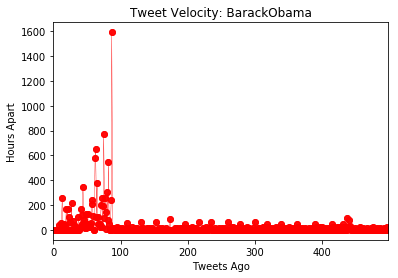

In [62]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.savefig('Obama.png')
plt.title("Tweet Velocity: %s" % target_user)
plt.show()